In [18]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")

In [4]:
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


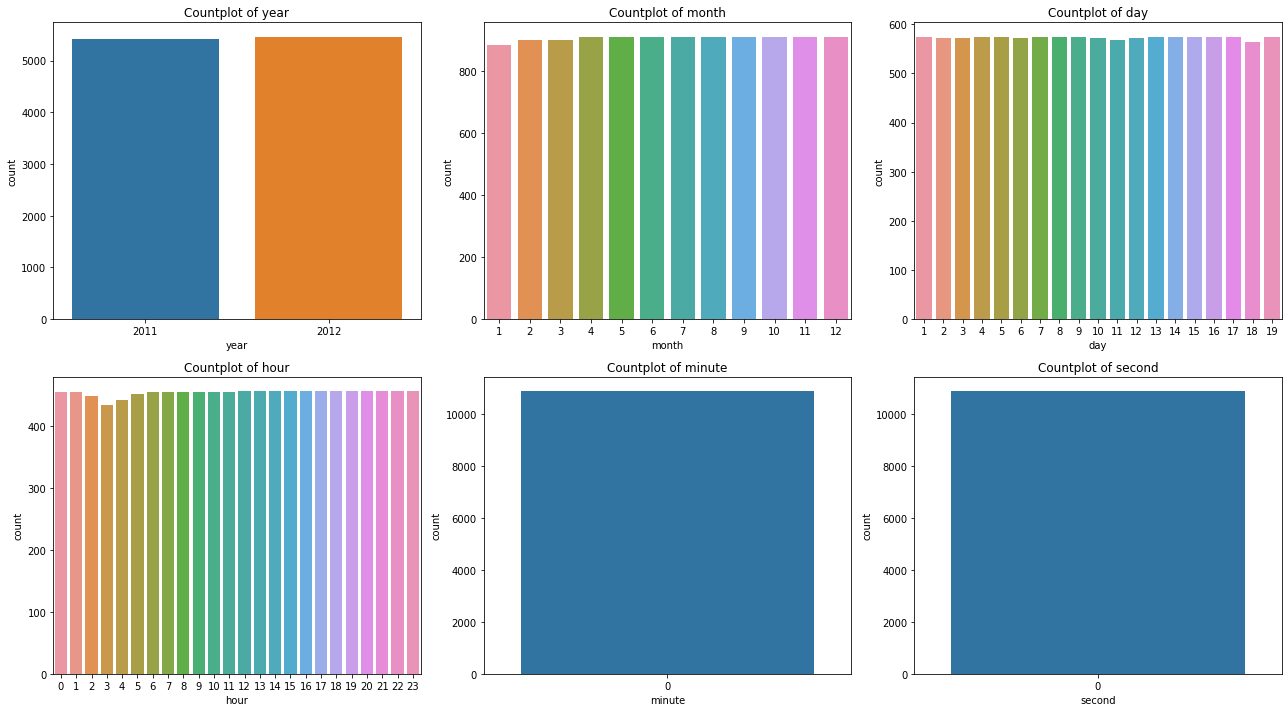

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

time_columns = ['year', 'month', 'day', 'hour', 'minute', 'second']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, column in enumerate(time_columns):
    sns.countplot(data=train, x=column, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Countplot of {column}')

plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 
           'year', 'month', 'day', 'hour']]

y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8708, 12)
X_test shape: (2178, 12)
y_train shape: (8708,)
y_test shape: (2178,)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)
y_pred

array([248.10627003,  48.79765547, 200.90676727, ..., 309.7528022 ,
        38.17030198, 243.62697388])

In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [20]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error: 19945.370053754028
Root Mean Squared Error (RMSE): 141.22807813517122
R² Score: 0.3957218526642554


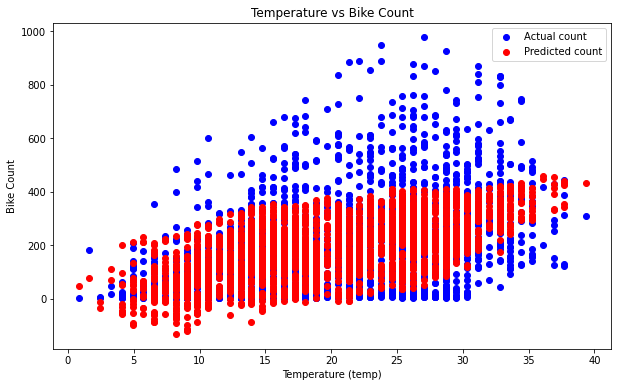

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test['temp'], y_test, color='blue', label='Actual count')
plt.scatter(X_test['temp'], y_pred, color='red', label='Predicted count')
plt.xlabel('Temperature (temp)')
plt.ylabel('Bike Count')
plt.title('Temperature vs Bike Count')

plt.legend()
plt.show()

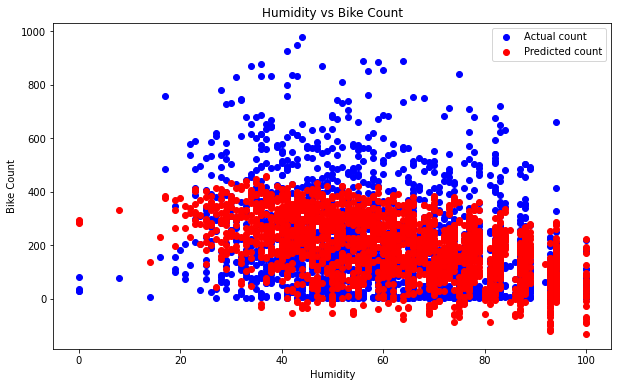

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['humidity'], y_test, color='blue', label='Actual count')
plt.scatter(X_test['humidity'], y_pred, color='red', label='Predicted count')
plt.xlabel('Humidity')
plt.ylabel('Bike Count')
plt.title('Humidity vs Bike Count')

plt.legend()
plt.show()